In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, time, datetime
%matplotlib inline

In [2]:
train_labels = pd.read_csv('train_labels.csv')
train_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [3]:
train_values = pd.read_csv('train_values.csv', usecols=['building_id', 'age', 'plan_configuration'])
train_values.shape

(260601, 3)

In [4]:
merged = train_values.merge(train_labels, how='inner')
merged

,building_id,age,plan_configuration,damage_grade
0,802906,30,d,3
1,28830,10,d,2
2,94947,10,d,3
3,590882,10,d,2
4,201944,30,d,3
...,...,...,...,...
260596,688636,55,q,2
260597,669485,0,d,3
260598,602512,55,d,3
260599,151409,10,d,2


In [5]:
merged_avg = merged.groupby(['plan_configuration', 'damage_grade']).agg({'age':'mean'})
merged_avg.columns = ['age_avg']
merged_avg.reset_index()

,plan_configuration,damage_grade,age_avg
0,a,1,23.106061
1,a,2,56.242038
2,a,3,51.034483
3,c,1,10.581395
4,c,2,26.553398
5,c,3,56.363636
6,d,1,17.772844
7,d,2,27.334746
8,d,3,27.690500
9,f,2,18.125000


In [6]:
pivot_table = merged_avg.pivot_table(index='plan_configuration', columns='damage_grade', values='age_avg', fill_value=0)
pivot_table.columns = [1, 2,	3]
pivot_table

,1,2,3
plan_configuration,,,
a,23.106061,56.242038,51.034483
c,10.581395,26.553398,56.363636
d,17.772844,27.334746,27.690500
f,0.000000,18.125000,15.833333
m,13.125000,110.000000,23.750000
n,17.500000,13.500000,24.583333
o,7.125000,30.104167,26.521739
q,12.202305,25.980658,29.944110
s,9.150943,24.529148,36.000000


Text(0, 0.5, 'Edad')

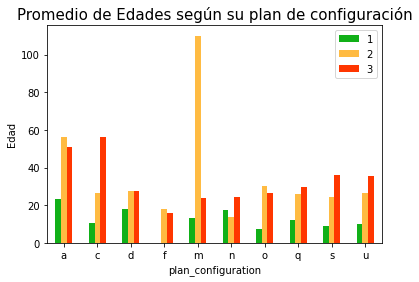

In [8]:
pivot_table[[1, 2, 3]].plot(kind="bar", rot=0,  color=['#11b018', '#ffbb42', '#ff3600'])
plt.title("Promedio de Edades según su plan de configuración", fontsize=15)
plt.ylabel("Edad")